# Infertility Dataset

## Data loading

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, pearsonr
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

In [82]:
import pandas as pd

# Define the full path to the file
file_path = r"C:\Users\lenovo\Downloads\Data for the final project of Data Mining\Female infertility.csv"

# Read the CSV file
df_infertility = pd.read_csv(file_path)

# Show the first few rows
df_infertility.head()

,Patient ID,Age,Ovulation Disorders,Blocked Fallopian Tubes,Endometriosis,Uterine Abnormalities,Pelvic Inflammatory Disease,Hormonal Imbalances,Premature Ovarian Insufficiency,Autoimmune Disorders,Previous Reproductive Surgeries,Unexplained Infertility,Infertility Prediction
0,1,32,1,0,1,0,0,1,0,0,0,1,1
1,2,28,0,1,0,1,0,1,0,0,0,0,0
2,3,35,1,0,1,0,1,1,0,1,1,0,1
3,4,30,0,1,0,1,0,0,1,0,1,0,1
4,5,33,1,0,0,0,0,1,1,0,0,1,1


## Data exploration

In [83]:
print(df_infertility.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Patient ID                       705 non-null    int64
 1   Age                              705 non-null    int64
 2   Ovulation Disorders              705 non-null    int64
 3   Blocked Fallopian Tubes          705 non-null    int64
 4   Endometriosis                    705 non-null    int64
 5   Uterine Abnormalities            705 non-null    int64
 6   Pelvic Inflammatory Disease      705 non-null    int64
 7   Hormonal Imbalances              705 non-null    int64
 8   Premature Ovarian Insufficiency  705 non-null    int64
 9   Autoimmune Disorders             705 non-null    int64
 10  Previous Reproductive Surgeries  705 non-null    int64
 11  Unexplained Infertility          705 non-null    int64
 12  Infertility Prediction           705 non-null    i

In [84]:
# Check for missing values
print(df_infertility.isnull().sum()) 

Patient ID                         0
Age                                0
Ovulation Disorders                0
Blocked Fallopian Tubes            0
Endometriosis                      0
Uterine Abnormalities              0
Pelvic Inflammatory Disease        0
Hormonal Imbalances                0
Premature Ovarian Insufficiency    0
Autoimmune Disorders               0
Previous Reproductive Surgeries    0
Unexplained Infertility            0
Infertility Prediction             0
dtype: int64


In [85]:
print("\nDescriptive Statistics")
display(df_infertility.describe(include='all'))


Descriptive Statistics


,Patient ID,Age,Ovulation Disorders,Blocked Fallopian Tubes,Endometriosis,Uterine Abnormalities,Pelvic Inflammatory Disease,Hormonal Imbalances,Premature Ovarian Insufficiency,Autoimmune Disorders,Previous Reproductive Surgeries,Unexplained Infertility,Infertility Prediction
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,37.441135,0.648227,0.618440,0.594326,0.595745,0.665248,0.720567,0.641135,0.581560,0.626950,0.521986,0.821277
std,203.660256,9.259041,0.477863,0.486114,0.491371,0.491096,0.472239,0.449039,0.480008,0.493653,0.483958,0.499871,0.383393
min,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,353.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,529.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,705.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Count unique values in each column
unique_counts =df_infertility.nunique()
print("\nUnique Values Count:\n", unique_counts)


Unique Values Count:
 Patient ID                         705
Age                                 36
Ovulation Disorders                  2
Blocked Fallopian Tubes              2
Endometriosis                        2
Uterine Abnormalities                2
Pelvic Inflammatory Disease          2
Hormonal Imbalances                  2
Premature Ovarian Insufficiency      2
Autoimmune Disorders                 2
Previous Reproductive Surgeries      2
Unexplained Infertility              2
Infertility Prediction               2
dtype: int64


In [97]:
# Inspect unique values in the 'Age' column more carefully
df_infertility['Age'].unique()


array([32, 28, 35, 30, 33, 36, 31, 29, 34, 27, 25, 26, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 58, 57, 56, 53, 59, 51, 60,
       55, 52], dtype=int64)

In [87]:
# Unique values and frequencies for all columns except 'Age' and 'Patient ID'

# Prepare list to store value counts
value_counts_list = []

# Loop through columns and collect value counts
for col in df_infertility.columns:
    if col in ['Age', 'Patient ID']:
        continue
    if df_infertility[col].dtype in ['object', 'int64']:
        counts = df_infertility[col].value_counts().reset_index()
        counts.columns = ['Value', 'Frequency']
        counts['Feature'] = col
        value_counts_list.append(counts)

# Combine into one DataFrame
value_counts_df = pd.concat(value_counts_list, ignore_index=True)

# Show the table
from IPython.display import display
display(value_counts_df)


,Value,Frequency,Feature
0,1,457,Ovulation Disorders
1,0,248,Ovulation Disorders
2,1,436,Blocked Fallopian Tubes
3,0,269,Blocked Fallopian Tubes
4,1,419,Endometriosis
5,0,286,Endometriosis
6,1,420,Uterine Abnormalities
7,0,285,Uterine Abnormalities
8,1,469,Pelvic Inflammatory Disease
9,0,236,Pelvic Inflammatory Disease


In [88]:
duplicates = df_infertility[df_infertility.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicated rows: 0
Empty DataFrame
Columns: [Patient ID, Age, Ovulation Disorders, Blocked Fallopian Tubes, Endometriosis, Uterine Abnormalities, Pelvic Inflammatory Disease, Hormonal Imbalances, Premature Ovarian Insufficiency, Autoimmune Disorders, Previous Reproductive Surgeries, Unexplained Infertility, Infertility Prediction]
Index: []


## Data analysis

In [89]:
from scipy.stats import chi2_contingency, pearsonr

# Prepare lists to store the results
p_values = {}
correlations = {}
significant_relationships = []
strong_correlations = []

# Calculate p-values and correlations
for col in df_infertility.columns:
    if col != 'Patient ID' and col != 'Infertility Prediction':
        if df_infertility[col].dtype == 'int64':
            # Assuming binary target variable and predictor, use chi-squared test
            contingency_table = pd.crosstab(df_infertility[col], df_infertility['Infertility Prediction'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values[col] = p
            if p < 0.05:
                significant_relationships.append((col, p))
            # Calculate Pearson correlation even for categorical (binary) variables
            correlation, _ = pearsonr(df_infertility[col], df_infertility['Infertility Prediction'])
            correlations[col] = correlation
            if abs(correlation) > 0.3:  # Define 'strong' correlation threshold as 0.3
                strong_correlations.append((col, correlation))
        else:
            print(f"Warning: Column '{col}' has unexpected data type for statistical analysis.")


# Summarize the findings
print("Summary of Statistical Analysis:")
print("\nP-values:")
for col, p in p_values.items():
    print(f"{col}: {p:.3f}")

print("\nPearson Correlation Coefficients:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.3f}")

print("\nStatistically Significant Relationships (p < 0.05):")
for col, p in significant_relationships:
    print(f"{col}: p-value = {p:.3f}")

print("\nStrong Correlations (|r| > 0.3):")
for col, corr in strong_correlations:
    print(f"{col}: r = {corr:.3f}")

Summary of Statistical Analysis:

P-values:
Age: 0.009
Ovulation Disorders: 0.000
Blocked Fallopian Tubes: 0.907
Endometriosis: 0.281
Uterine Abnormalities: 0.374
Pelvic Inflammatory Disease: 0.000
Hormonal Imbalances: 0.069
Premature Ovarian Insufficiency: 0.000
Autoimmune Disorders: 0.002
Previous Reproductive Surgeries: 0.000
Unexplained Infertility: 0.000

Pearson Correlation Coefficients:
Age: 0.076
Ovulation Disorders: 0.207
Blocked Fallopian Tubes: -0.008
Endometriosis: 0.044
Uterine Abnormalities: -0.037
Pelvic Inflammatory Disease: 0.156
Hormonal Imbalances: 0.073
Premature Ovarian Insufficiency: 0.153
Autoimmune Disorders: 0.122
Previous Reproductive Surgeries: 0.375
Unexplained Infertility: 0.406

Statistically Significant Relationships (p < 0.05):
Age: p-value = 0.009
Ovulation Disorders: p-value = 0.000
Pelvic Inflammatory Disease: p-value = 0.000
Premature Ovarian Insufficiency: p-value = 0.000
Autoimmune Disorders: p-value = 0.002
Previous Reproductive Surgeries: p-value

## Data visualization

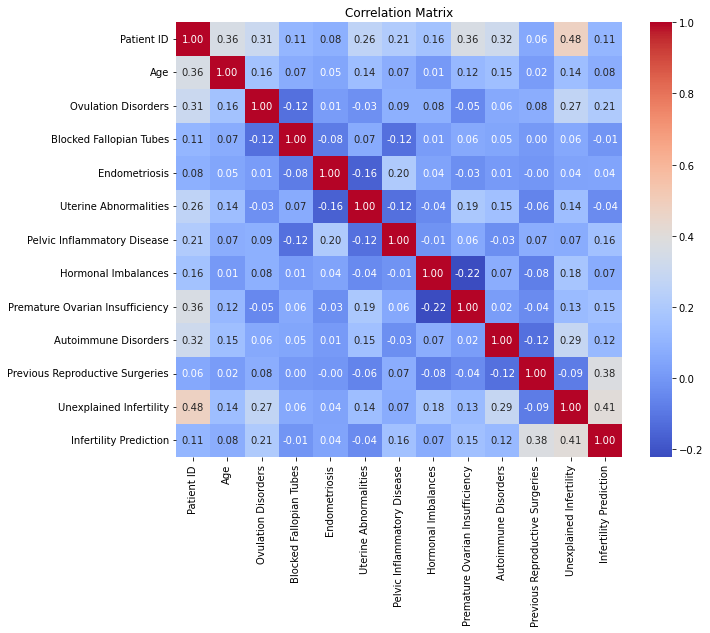


Correlation with Diagnosis:
 Infertility Prediction             1.000000
Unexplained Infertility            0.405948
Previous Reproductive Surgeries    0.375089
Ovulation Disorders                0.206829
Pelvic Inflammatory Disease        0.155508
Premature Ovarian Insufficiency    0.152696
Autoimmune Disorders               0.122159
Patient ID                         0.110388
Age                                0.076261
Hormonal Imbalances                0.072537
Endometriosis                      0.044374
Blocked Fallopian Tubes           -0.008205
Uterine Abnormalities             -0.037240
Name: Infertility Prediction, dtype: float64


In [90]:
# -------------------------------
# Correlation Analysis
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df_infertility.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with 'Diagnosis'
diagnosis_corr = corr['Infertility Prediction'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", diagnosis_corr)

In [118]:
# -------------------------------
# Correlation Analysis
# -------------------------------

# Focus on correlation with 'Diagnosis'
diagnosis_corr = corr['Endometriosis'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", diagnosis_corr)

# Focus on correlation with 'Diagnosis'
diagnosis_corr = corr['Ovulation Disorders'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", diagnosis_corr)



Correlation with Diagnosis:
 Endometriosis                      1.000000
Pelvic Inflammatory Disease        0.203607
Patient ID                         0.084058
Age                                0.048132
Infertility Prediction             0.044374
Hormonal Imbalances                0.039156
Unexplained Infertility            0.036364
Ovulation Disorders                0.014476
Autoimmune Disorders               0.007766
Previous Reproductive Surgeries   -0.004135
Premature Ovarian Insufficiency   -0.027917
Blocked Fallopian Tubes           -0.084005
Uterine Abnormalities             -0.162566
Name: Endometriosis, dtype: float64

Correlation with Diagnosis:
 Ovulation Disorders                1.000000
Patient ID                         0.305323
Unexplained Infertility            0.270286
Infertility Prediction             0.206829
Age                                0.162254
Pelvic Inflammatory Disease        0.088007
Hormonal Imbalances                0.084075
Previous Reproductive Su

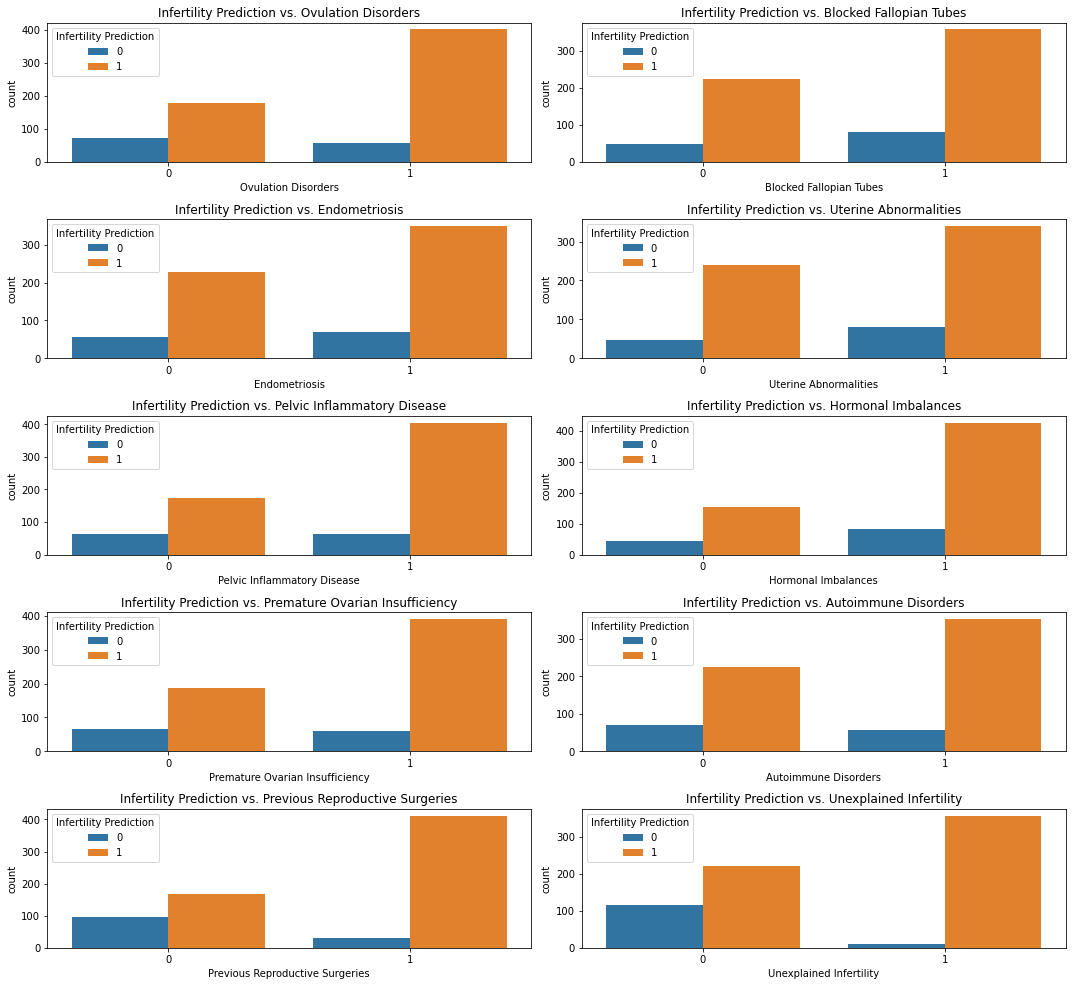

In [91]:

# Bar charts for categorical variables
categorical_cols = ['Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis',
                   'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances',
                   'Premature Ovarian Insufficiency', 'Autoimmune Disorders',
                   'Previous Reproductive Surgeries', 'Unexplained Infertility']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
  plt.subplot(5, 2, i+1)
  sns.countplot(x=col, hue='Infertility Prediction', data=df_infertility)
  plt.title(f'Infertility Prediction vs. {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

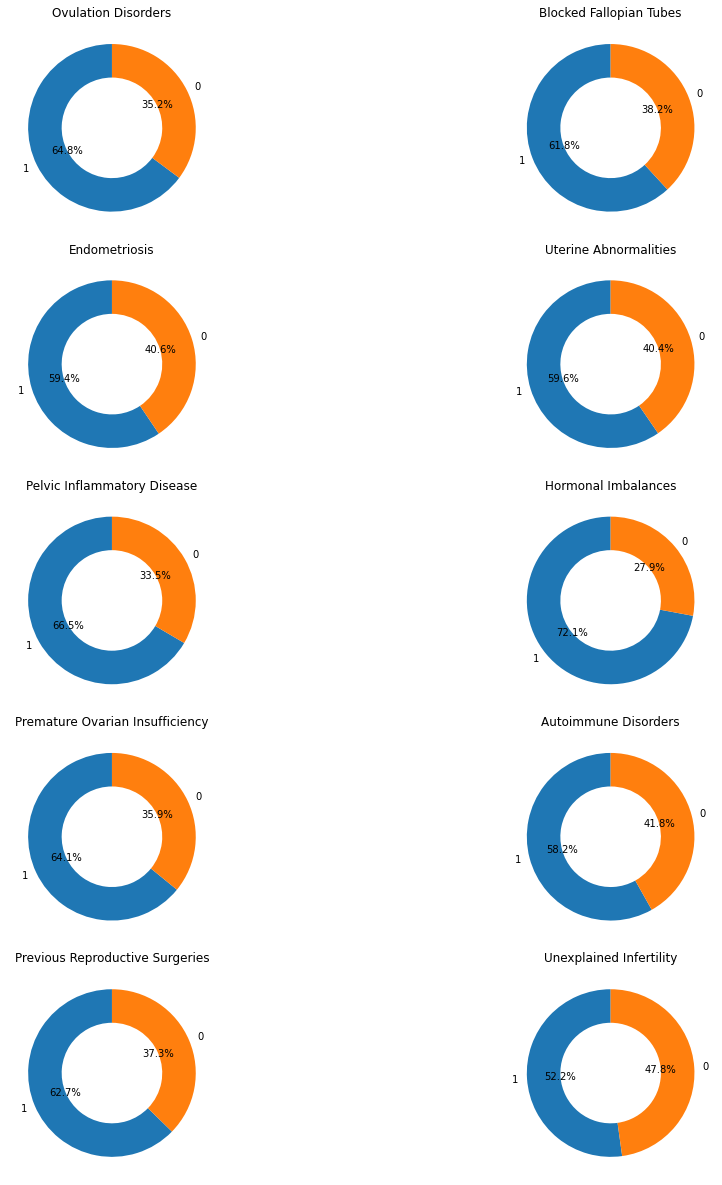

In [92]:


# List of categorical columns
categorical_cols = ['Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis',
                    'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances',
                    'Premature Ovarian Insufficiency', 'Autoimmune Disorders',
                    'Previous Reproductive Surgeries', 'Unexplained Infertility']

# Plot pie charts
plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    
    # Count each class of Infertility Prediction for this category
    pie_data = df_infertility.groupby(col)['Infertility Prediction'].value_counts().unstack().fillna(0)

    # Combine into a single pie chart per category (summed for simplicity)
    total_counts = df_infertility[col].value_counts()
    total_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=total_counts.index, 
                          wedgeprops=dict(width=0.4), legend=False)
    
    plt.title(col)
    plt.ylabel('')  # Hide default ylabel

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

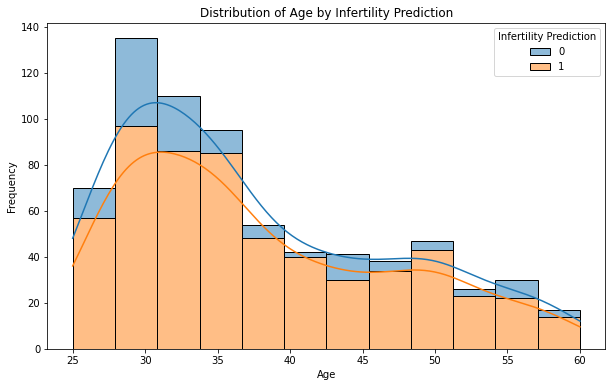

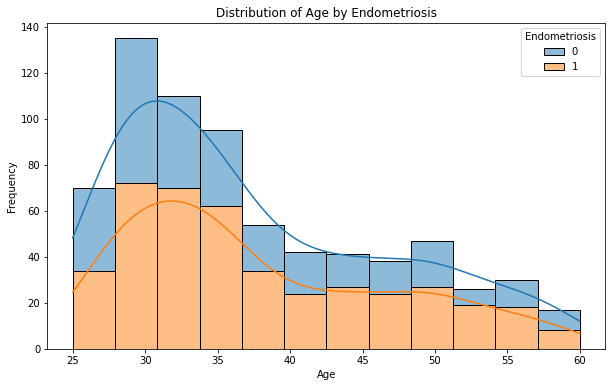

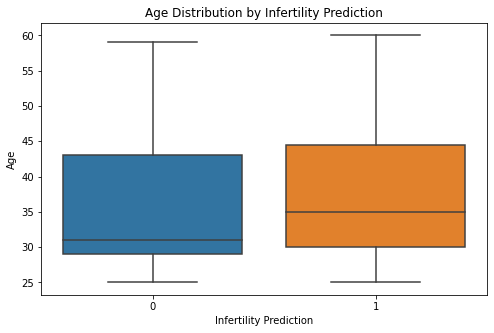

In [93]:


# Examine the relationship between 'Age' and the target
plt.figure(figsize=(10, 6))
sns.histplot(data=df_infertility, x='Age', hue='Infertility Prediction', multiple='stack', kde=True)
plt.title('Distribution of Age by Infertility Prediction')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_infertility, x='Age', hue='Endometriosis', multiple='stack', kde=True)
plt.title('Distribution of Age by Endometriosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# You could also consider other visualizations for age, like a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Infertility Prediction', y='Age', data=df_infertility)
plt.title('Age Distribution by Infertility Prediction')
plt.xlabel('Infertility Prediction')
plt.ylabel('Age')
plt.show()

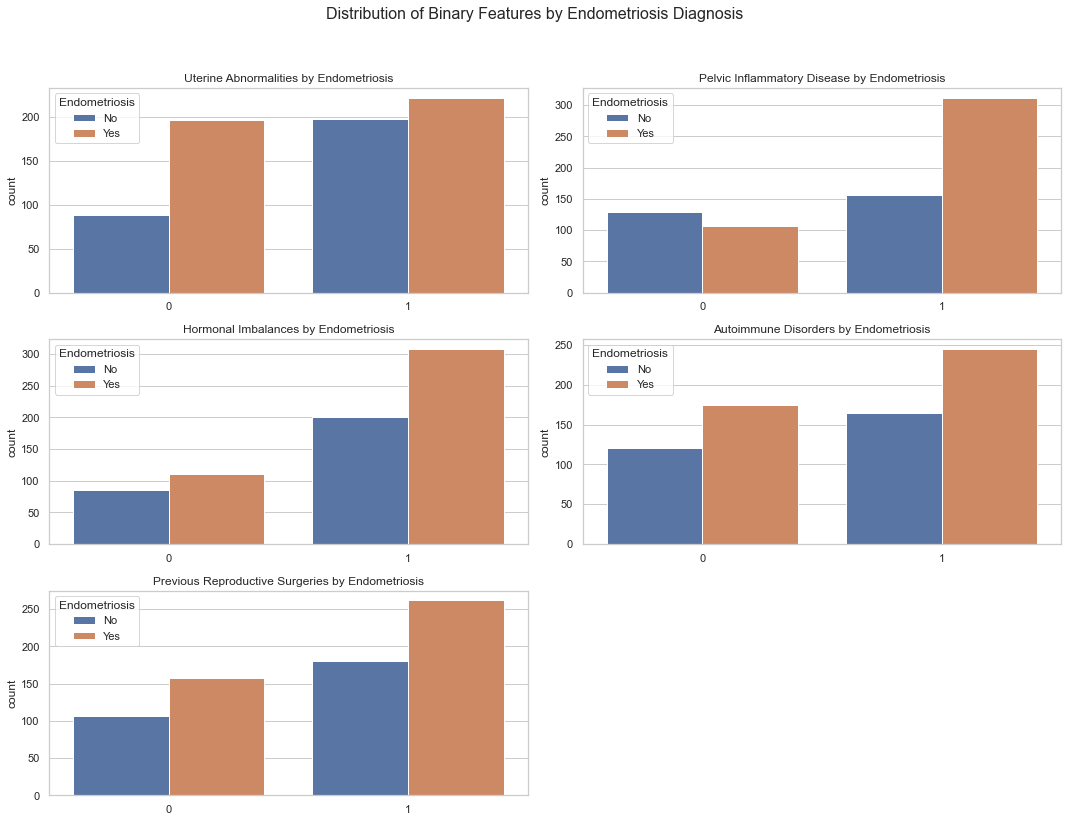

In [121]:
# List of binary features to explore
binary_features = [
    'Uterine Abnormalities',
    'Pelvic Inflammatory Disease',
    'Hormonal Imbalances',
    'Autoimmune Disorders',
    'Previous Reproductive Surgeries'
]

# Set plot stylea
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 12))
plt.suptitle('Distribution of Binary Features by Endometriosis Diagnosis', fontsize=16)

for i, feature in enumerate(binary_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_infertility, x=feature, hue='Endometriosis')
    plt.title(f'{feature} by Endometriosis')
    plt.xlabel('')
    plt.legend(title='Endometriosis', labels=['No', 'Yes'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

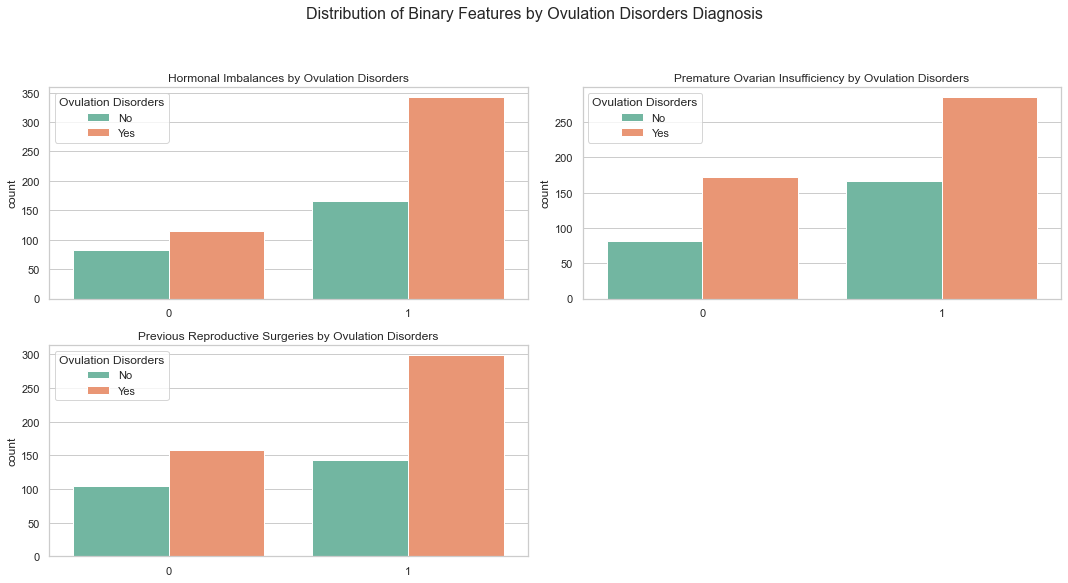

In [120]:
# List of binary features to explore
binary_features = [ 'Hormonal Imbalances',
    'Premature Ovarian Insufficiency', 
    'Previous Reproductive Surgeries'
]

# Set plot stylea
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 12))
plt.suptitle('Distribution of Binary Features by Ovulation Disorders Diagnosis', fontsize=16)

for i, feature in enumerate(binary_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_infertility, x=feature, hue='Ovulation Disorders', palette='Set2')
    plt.title(f'{feature} by Ovulation Disorders')
    plt.xlabel('')
    plt.legend(title='Ovulation Disorders', labels=['No', 'Yes'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8272\1048935115.py:19: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df_long['Presence'].cat.set_categories([0, 1], inplace=True)


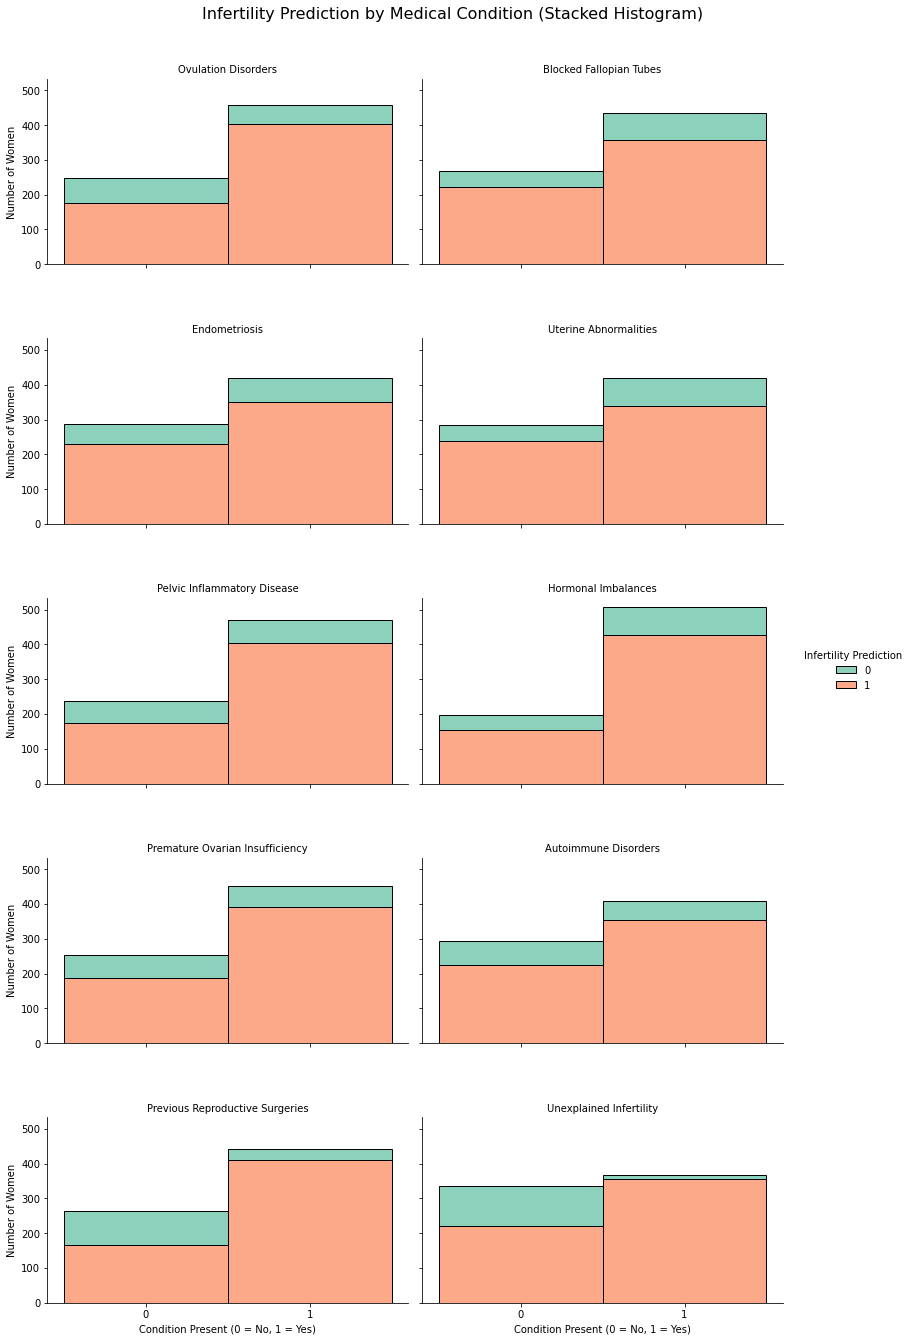

In [94]:
# Binary features
binary_features = [
    'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis',
    'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances',
    'Premature Ovarian Insufficiency', 'Autoimmune Disorders',
    'Previous Reproductive Surgeries', 'Unexplained Infertility'
]

# Melt to long format
df_long = df_infertility.melt(
    id_vars='Infertility Prediction',
    value_vars=binary_features,
    var_name='Medical Condition',
    value_name='Presence'
)

# Make sure Presence is categorical with fixed order [0, 1]
df_long['Presence'] = df_long['Presence'].astype("category")
df_long['Presence'].cat.set_categories([0, 1], inplace=True)

# Plot: stacked histogram (0/1 only on x-axis)
g = sns.displot(
    data=df_long,
    x='Presence',
    hue='Infertility Prediction',
    col='Medical Condition',
    col_wrap=2,
    kind='hist',
    multiple='stack',
    discrete=True,
    palette='Set2',
    height=4,
    aspect=1.4
)

# Fix axis labels and ticks
g.set_axis_labels("Condition Present (0 = No, 1 = Yes)", "Number of Women")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticks([0, 1])  # Show only 0 and 1 on x-axis

# Adjust layout
g.fig.subplots_adjust(top=0.93, bottom=0.08, hspace=0.4)
g.fig.suptitle("Infertility Prediction by Medical Condition (Stacked Histogram)", fontsize=16)

plt.show()

## Model Traning

###  Model Traning - with 10-fold cross-validation only without balancing the Traget

In [100]:

X = df_infertility.drop(columns=['Infertility Prediction', 'Patient ID'])
y = df_infertility['Infertility Prediction']

# Define feature types
categorical_features = ['Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis',
    'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances',
    'Premature Ovarian Insufficiency', 'Autoimmune Disorders',
    'Previous Reproductive Surgeries', 'Unexplained Infertility']
numerical_features = ['Age']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Define models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

# Evaluation metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = y_pred  # fallback, not ideal for AUC

        model_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        model_scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores['recall'].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores['f1'].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores['roc_auc'].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    # Save average results
    results[model_name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[model_name]['confusion_matrix'] = np.mean(confusion_matrices, axis=0).astype(int)

# Format results
comparison_df = pd.DataFrame(results).T
comparison_df_sorted = comparison_df.drop(columns='confusion_matrix').sort_values(by='f1', ascending=False)

comparison_df

,accuracy,precision,recall,f1,roc_auc,confusion_matrix
KNeighborsClassifier,0.87662,0.886581,0.974348,0.927893,0.859958,"[[5, 7], [1, 56]]"
DecisionTreeClassifier,0.870946,0.914857,0.930067,0.921537,0.77143,"[[7, 5], [4, 53]]"
RandomForestClassifier,0.913501,0.925698,0.972849,0.948364,0.94154,"[[8, 4], [1, 56]]"
GradientBoostingClassifier,0.917746,0.933178,0.969278,0.950669,0.933422,"[[8, 4], [1, 56]]"


###  Model Traning - with 10-fold cross-validation only with balancing the Traget

Model Performance Comparison:

                  accuracy precision    recall        f1   roc_auc
RandomForest      0.910684  0.932493  0.960663  0.946064  0.943795
VotingClassifier  0.903521  0.941417  0.942388  0.941251  0.941652
GradientBoosting  0.902213  0.940987  0.939979  0.940187  0.937325
KNN               0.878109  0.941327  0.908826  0.924127   0.88209
DecisionTree      0.875231  0.931578  0.916503  0.922938  0.808295

Average Confusion Matrices:

KNN:
[[ 9  3]
 [ 5 52]]

DecisionTree:
[[ 8  3]
 [ 4 53]]

RandomForest:
[[ 8  4]
 [ 2 55]]

GradientBoosting:
[[ 9  3]
 [ 3 54]]

VotingClassifier:
[[ 9  3]
 [ 3 54]]


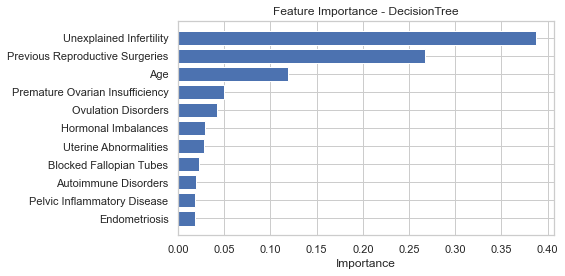

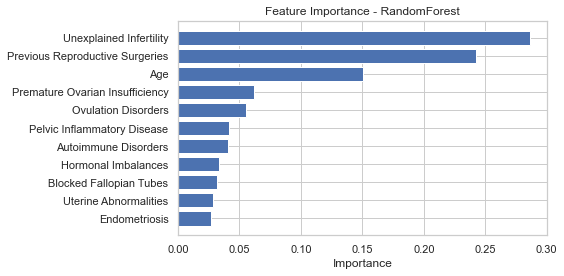

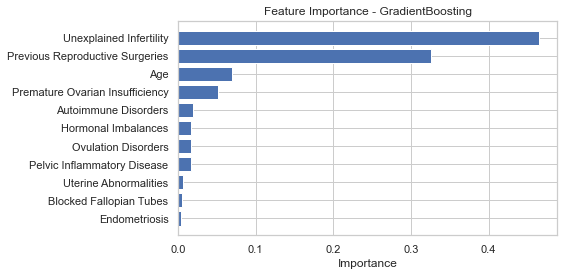

In [123]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Choose one resampling strategy
sampling_strategy = 'smote'  


for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if sampling_strategy == 'smote':
            sampler = SMOTE(random_state=42)
        elif sampling_strategy == 'over':
            sampler = RandomOverSampler(random_state=42)
        elif sampling_strategy == 'under':
            sampler = RandomUnderSampler(random_state=42)
        else:
            raise ValueError("Invalid sampling_strategy. Choose 'smote', 'over', or 'under'.")

        X_train, y_train = sampler.fit_resample(X_train, y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()
        
        
# Display results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:\n")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Show confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]  # Sort descending
    sorted_features = np.array(X.columns)[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()  # Most important at top
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

###  Model Traning - with 10-fold cross-validation And SelectKBest K=2 without balancing

Selected features: ['Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN               0.910664  0.934037  0.958779  0.946169  0.826515
DecisionTree      0.910664  0.934037  0.958779  0.946169  0.887743
RandomForest      0.910664  0.934037  0.958779  0.946169  0.887743
GradientBoosting  0.910664  0.934037  0.958779  0.946169  0.887743
VotingClassifier  0.910664  0.934037  0.958779  0.946169  0.887743

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 2 55]]

DecisionTree:
[[ 8  3]
 [ 2 55]]

RandomForest:
[[ 8  3]
 [ 2 55]]

GradientBoosting:
[[ 8  3]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 2 55]]


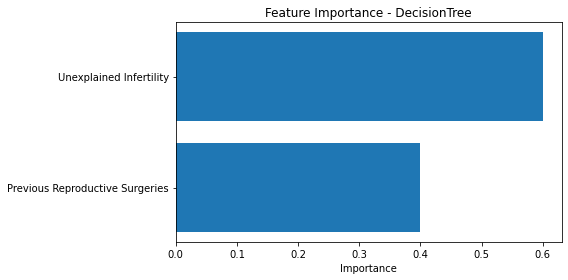

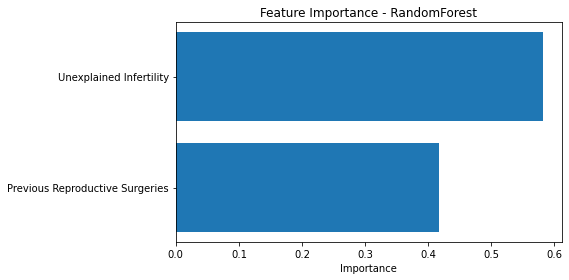

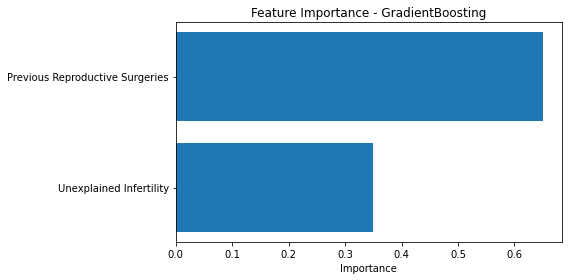

In [106]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 2
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))


X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=2 with balancing

Selected features: ['Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN               0.910664  0.934037  0.958779  0.946169  0.810311
DecisionTree      0.910664  0.934037  0.958779  0.946169  0.887743
RandomForest      0.910664  0.934037  0.958779  0.946169  0.887743
GradientBoosting  0.910664  0.934037  0.958779  0.946169  0.887743
VotingClassifier  0.910664  0.934037  0.958779  0.946169  0.887743

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 2 55]]

DecisionTree:
[[ 8  3]
 [ 2 55]]

RandomForest:
[[ 8  3]
 [ 2 55]]

GradientBoosting:
[[ 8  3]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 2 55]]


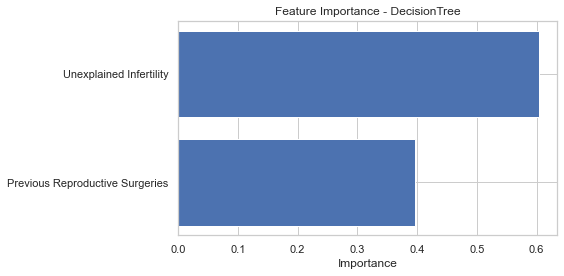

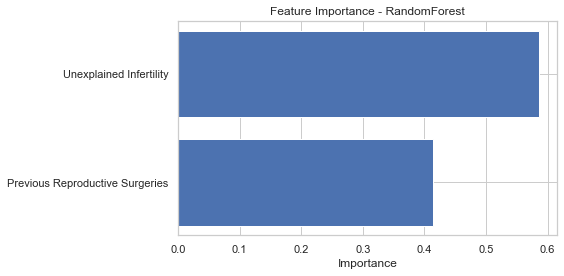

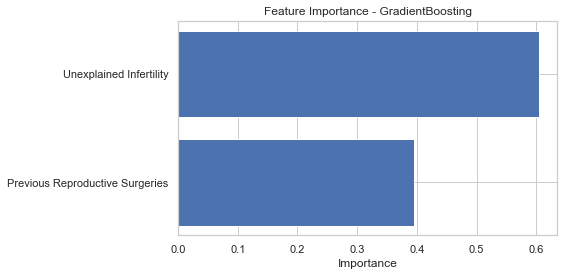

In [124]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 2
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=3 without balancing 

Selected features: ['Premature Ovarian Insufficiency', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN               0.910664  0.934037  0.958779  0.946169  0.822477
GradientBoosting  0.910664  0.934037  0.958779  0.946169  0.912397
VotingClassifier  0.910664  0.934037  0.958779  0.946169  0.913167
DecisionTree      0.832696  0.955023  0.834159  0.889603  0.912397
RandomForest      0.825654  0.961373  0.819873  0.884448  0.913167

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 2 55]]

DecisionTree:
[[10  2]
 [ 9 48]]

RandomForest:
[[10  1]
 [10 47]]

GradientBoosting:
[[ 8  3]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 2 55]]


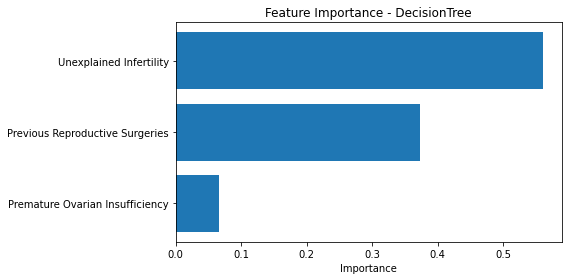

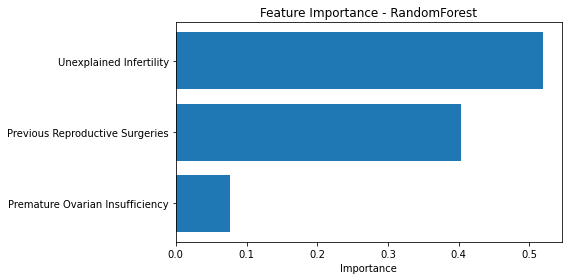

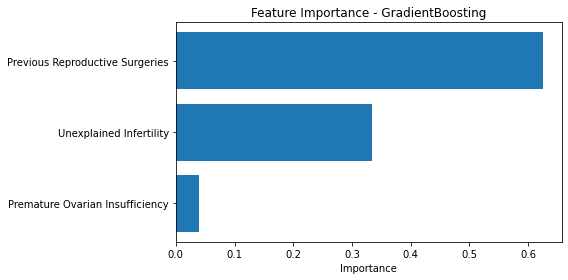

In [107]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Feature selection: select top k best features using mutual_info_classif
k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=3 with balancing

Selected features: ['Blocked Fallopian Tubes', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1  roc_auc
KNN               0.910664  0.934037  0.958779  0.946169  0.80791
DecisionTree      0.902093  0.937126  0.944493  0.940063  0.89262
RandomForest      0.902093  0.937126  0.944493  0.940063  0.89262
GradientBoosting  0.902093  0.937126  0.944493  0.940063  0.89262
VotingClassifier  0.902093  0.937126  0.944493  0.940063  0.89262

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 2 55]]

DecisionTree:
[[ 8  3]
 [ 3 54]]

RandomForest:
[[ 8  3]
 [ 3 54]]

GradientBoosting:
[[ 8  3]
 [ 3 54]]

VotingClassifier:
[[ 8  3]
 [ 3 54]]


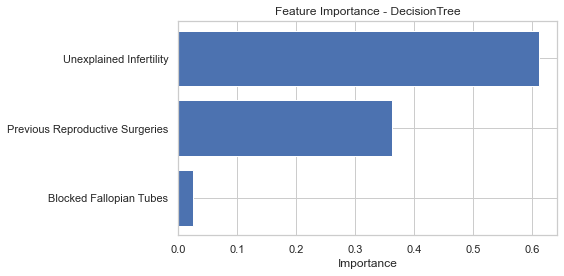

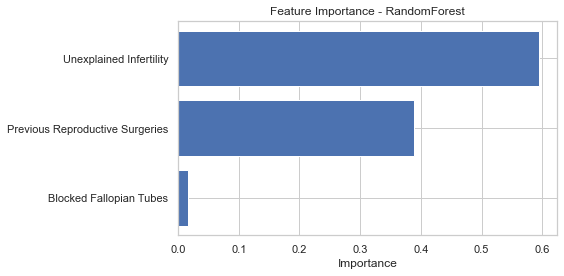

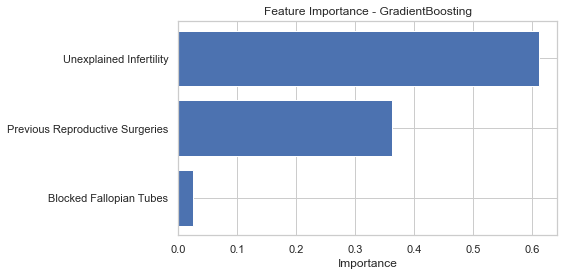

In [125]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=4 without balaning 

Selected features: ['Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.909235  0.933907  0.956961  0.945203  0.905691
KNN               0.909235  0.940069  0.950396   0.94493  0.835722
RandomForest      0.906378   0.94296   0.94325  0.942727  0.903462
VotingClassifier  0.906378   0.94296   0.94325  0.942727  0.906523
DecisionTree      0.890865  0.943619  0.920278  0.930623  0.903851

Average Confusion Matrices:

KNN:
[[ 9  3]
 [ 2 55]]

DecisionTree:
[[ 9  3]
 [ 4 53]]

RandomForest:
[[ 9  3]
 [ 3 54]]

GradientBoosting:
[[ 8  3]
 [ 2 55]]

VotingClassifier:
[[ 9  3]
 [ 3 54]]


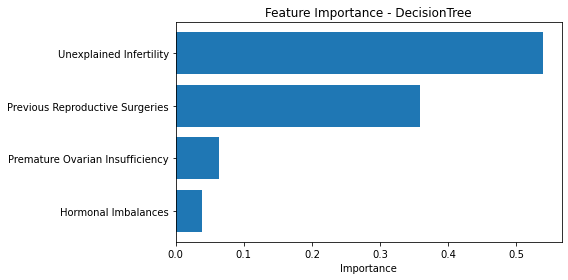

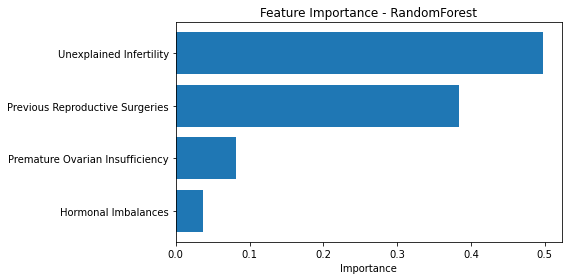

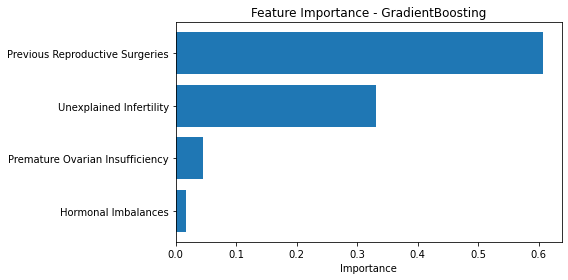

In [108]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 4
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=4 with balancing

Selected features: ['Pelvic Inflammatory Disease', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN               0.907787  0.907504  0.988259   0.94592  0.823068
DecisionTree      0.882233  0.937985  0.916317  0.926885  0.889994
RandomForest      0.882233  0.937985  0.916317  0.926885  0.890508
GradientBoosting  0.882233  0.937985  0.916317  0.926885   0.89266
VotingClassifier  0.882233  0.937985  0.916317  0.926885  0.890924

Average Confusion Matrices:

KNN:
[[ 6  5]
 [ 0 57]]

DecisionTree:
[[ 9  3]
 [ 4 53]]

RandomForest:
[[ 9  3]
 [ 4 53]]

GradientBoosting:
[[ 9  3]
 [ 4 53]]

VotingClassifier:
[[ 9  3]
 [ 4 53]]


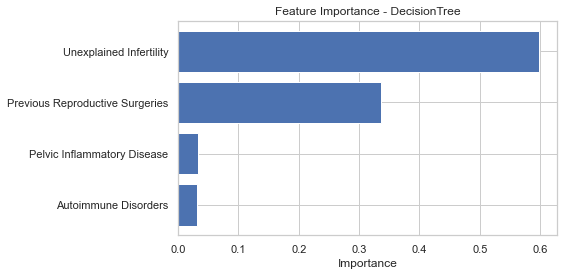

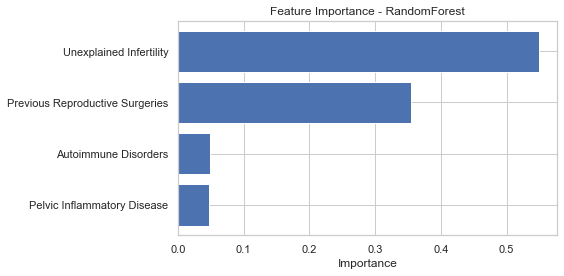

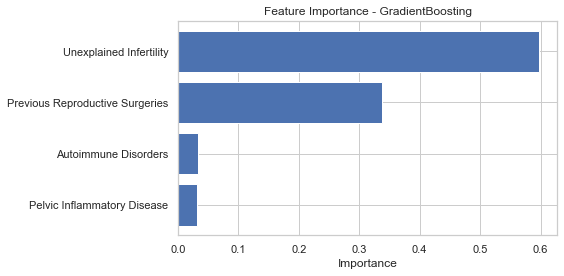

In [127]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]


categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 4
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


##  Model Traning - with 10-fold cross-validation And SelectKBest K=5 without balancing

Selected features: ['Endometriosis', 'Uterine Abnormalities', 'Hormonal Imbalances', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN                0.90499  0.927902  0.958779  0.942971  0.821001
GradientBoosting   0.90499  0.927902  0.958779  0.942971  0.879659
VotingClassifier  0.902173   0.93474  0.946946  0.940622  0.879237
RandomForest      0.900765  0.939071   0.93996  0.939349  0.877442
DecisionTree      0.896519  0.938767  0.934862  0.936611  0.877296

Average Confusion Matrices:

KNN:
[[ 8  4]
 [ 2 55]]

DecisionTree:
[[ 9  3]
 [ 3 54]]

RandomForest:
[[ 9  3]
 [ 3 54]]

GradientBoosting:
[[ 8  4]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 3 54]]


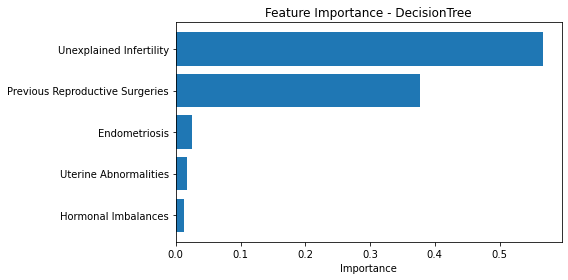

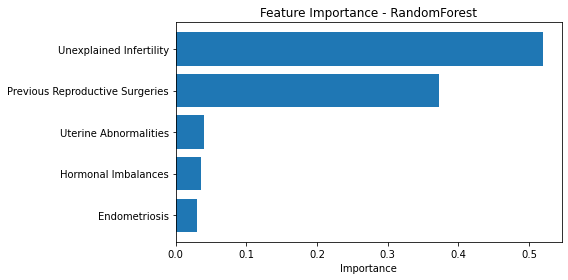

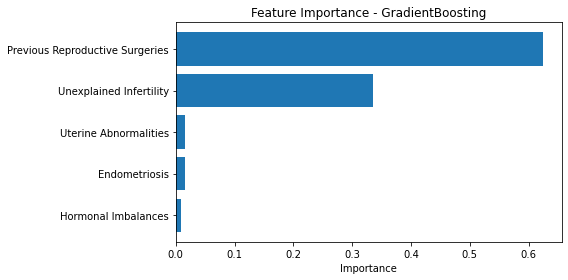

In [105]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]


categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=5 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Uterine Abnormalities', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.889477   0.93699  0.928053  0.932307  0.896094
VotingClassifier  0.869638  0.926573  0.914524  0.920193  0.897121
RandomForest      0.865372  0.926259  0.910045  0.917477  0.883836
DecisionTree      0.865453   0.93378  0.901018   0.91648   0.81418
KNN               0.844145  0.930046  0.877769  0.902475   0.85938

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 7 50]]

DecisionTree:
[[ 8  3]
 [ 5 52]]

RandomForest:
[[ 8  4]
 [ 5 52]]

GradientBoosting:
[[ 9  3]
 [ 4 53]]

VotingClassifier:
[[ 8  4]
 [ 5 52]]


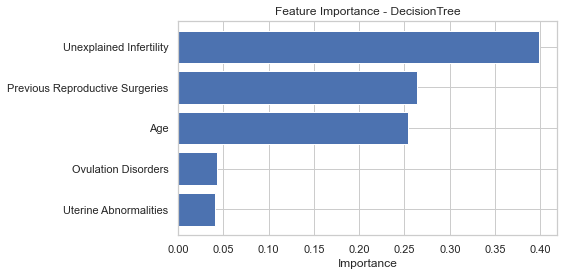

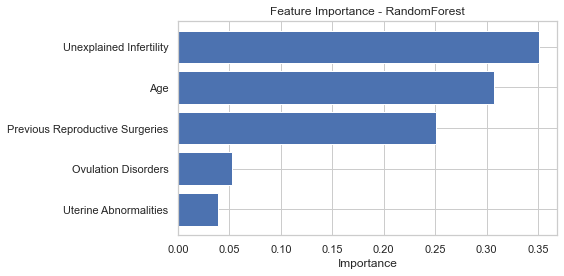

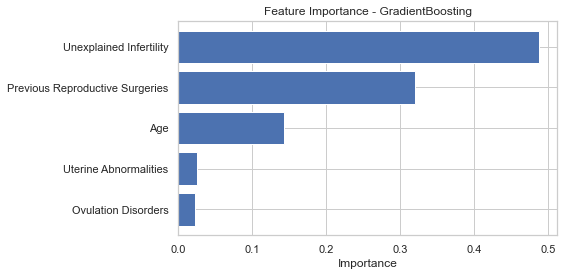

In [128]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]

s
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=6 without balancing

Selected features: ['Age', 'Ovulation Disorders', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.917787  0.930448  0.972744  0.950849  0.930368
KNN               0.907867  0.917862  0.973998  0.944937  0.892208
VotingClassifier  0.906439  0.941006  0.944702  0.942483  0.936159
RandomForest      0.896579  0.932272  0.940831  0.936133  0.918267
DecisionTree      0.882334   0.94121  0.914558  0.926914  0.840224

Average Confusion Matrices:

KNN:
[[ 7  5]
 [ 1 56]]

DecisionTree:
[[ 9  3]
 [ 5 52]]

RandomForest:
[[ 8  3]
 [ 3 54]]

GradientBoosting:
[[ 8  4]
 [ 1 56]]

VotingClassifier:
[[ 9  3]
 [ 3 54]]


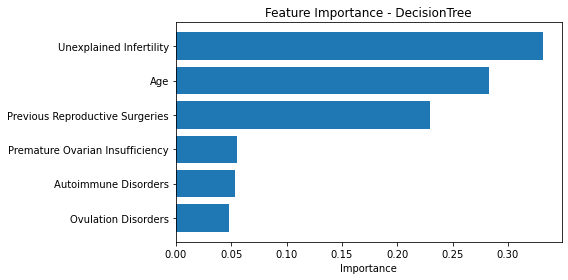

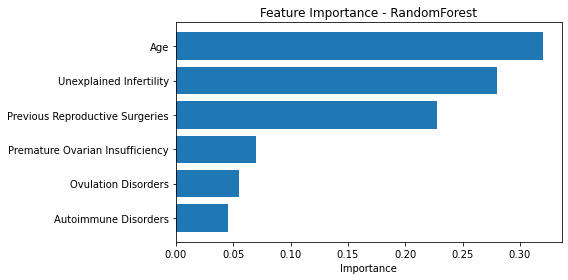

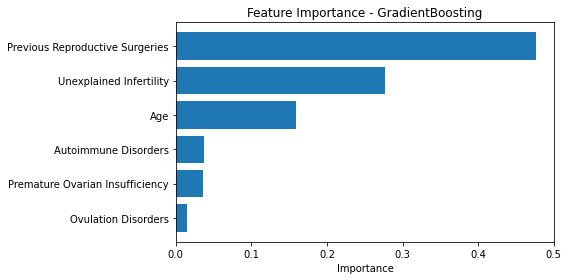

In [109]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 6
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=6 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Pelvic Inflammatory Disease', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.906358  0.932454   0.95543  0.943732  0.902502
VotingClassifier  0.880744  0.919871  0.936246  0.927583  0.880881
RandomForest      0.862374  0.916593  0.915354  0.915839    0.8618
DecisionTree       0.85664  0.914425  0.910605   0.91211  0.748423
KNN                0.84829  0.931158  0.881975  0.905195  0.824035

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 6 51]]

DecisionTree:
[[ 7  4]
 [ 5 52]]

RandomForest:
[[ 7  4]
 [ 4 53]]

GradientBoosting:
[[ 8  4]
 [ 2 55]]

VotingClassifier:
[[ 7  4]
 [ 3 54]]


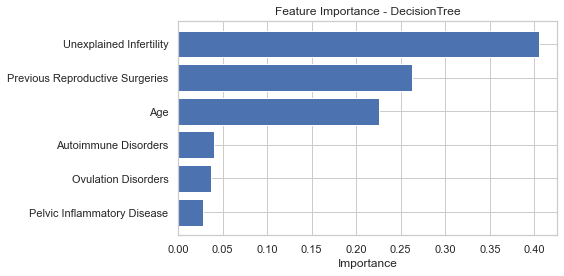

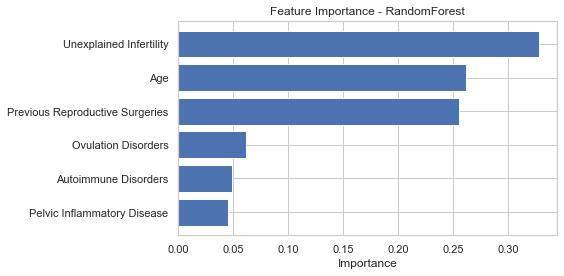

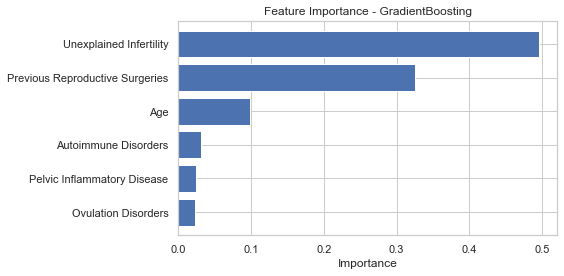

In [130]:
from imblearn.over_sampling import SMOTE

X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 6
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=7 without balancing

Selected features: ['Ovulation Disorders', 'Endometriosis', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
KNN               0.902193  0.909787  0.978114  0.942394  0.851888
GradientBoosting  0.900724  0.916476  0.967406  0.940865  0.889547
VotingClassifier  0.878048   0.92212  0.928508  0.925085  0.885515
RandomForest      0.858189  0.923034  0.900559  0.911418  0.881957
DecisionTree      0.842616  0.930887  0.870871  0.899653  0.841465

Average Confusion Matrices:

KNN:
[[ 7  5]
 [ 1 56]]

DecisionTree:
[[ 8  3]
 [ 7 50]]

RandomForest:
[[ 8  4]
 [ 5 52]]

GradientBoosting:
[[ 7  5]
 [ 1 56]]

VotingClassifier:
[[ 8  4]
 [ 4 53]]


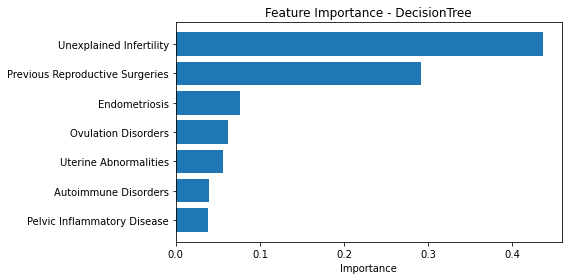

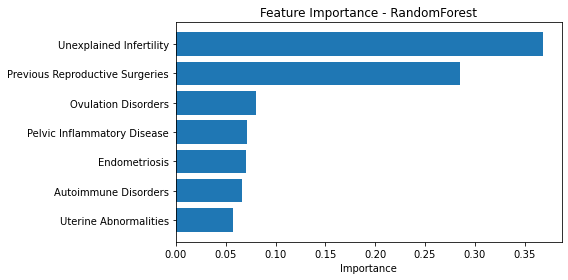

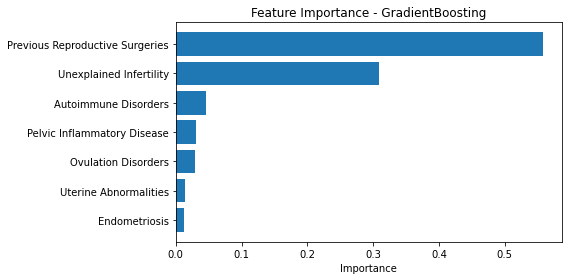

In [110]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=7 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting   0.90499    0.9325  0.953993  0.942887  0.899494
RandomForest      0.870946  0.918803  0.924557   0.92143  0.876091
VotingClassifier  0.869517  0.920288  0.921476  0.920268  0.893594
DecisionTree      0.846801  0.915673  0.897957  0.905562  0.759577
KNN               0.824245  0.923947  0.857458  0.888429   0.80641

Average Confusion Matrices:

KNN:
[[ 8  4]
 [ 8 49]]

DecisionTree:
[[ 7  4]
 [ 6 51]]

RandomForest:
[[ 7  4]
 [ 4 53]]

GradientBoosting:
[[ 8  4]
 [ 2 55]]

VotingClassifier:
[[ 8  4]
 [ 4 53]]


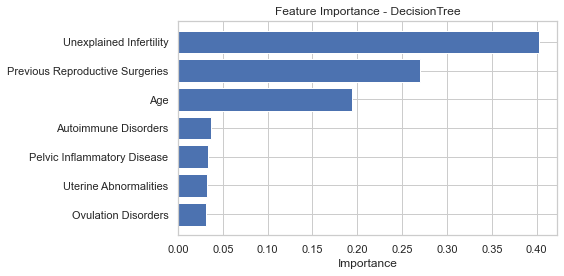

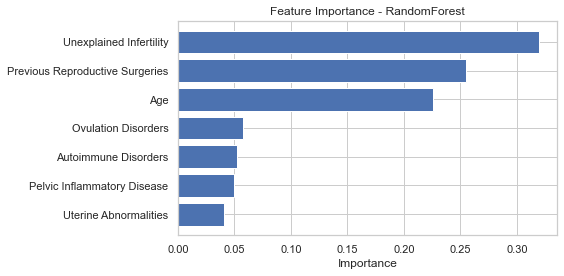

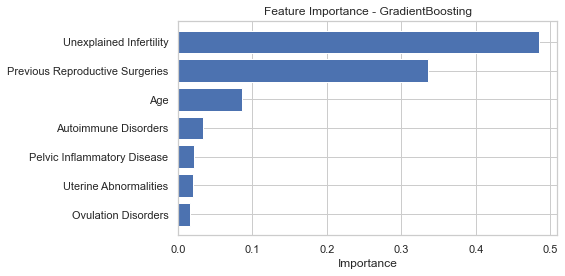

In [131]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=8 without balancing

Selected features: ['Age', 'Ovulation Disorders', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.920604    0.9305  0.976288  0.952544  0.931673
VotingClassifier  0.892133  0.928744   0.94107  0.934307  0.933208
KNN               0.882274  0.895731    0.9692  0.930393  0.877191
RandomForest      0.883682  0.916184  0.945072  0.929797  0.928252
DecisionTree      0.876539  0.927523  0.922694  0.924473  0.797624

Average Confusion Matrices:

KNN:
[[ 6  6]
 [ 1 56]]

DecisionTree:
[[ 8  4]
 [ 4 53]]

RandomForest:
[[ 7  5]
 [ 3 54]]

GradientBoosting:
[[ 8  4]
 [ 1 56]]

VotingClassifier:
[[ 8  4]
 [ 3 54]]


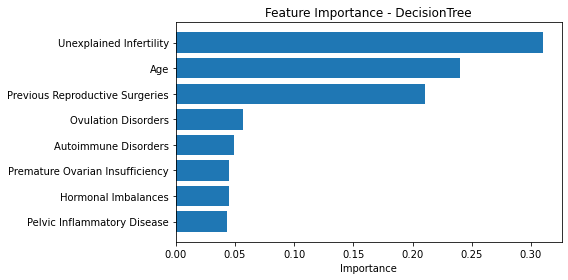

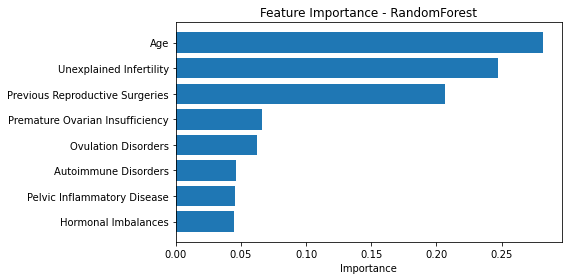

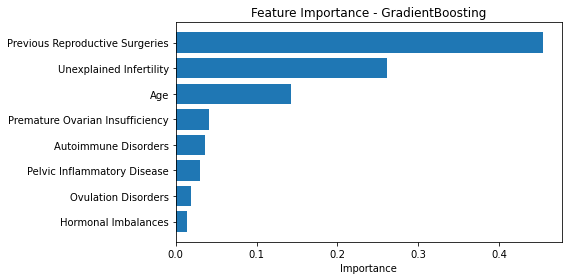

In [111]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 8
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=8 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis', 'Pelvic Inflammatory Disease', 'Premature Ovarian Insufficiency', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.890865  0.932441  0.933832  0.932984  0.912985
RandomForest      0.882435  0.921431  0.936141  0.928342  0.906816
VotingClassifier  0.883823  0.930232  0.927129  0.928313  0.915535
DecisionTree      0.871006  0.927852  0.913238   0.91985  0.792509
KNN               0.832837  0.922688  0.868602  0.894195  0.835894

Average Confusion Matrices:

KNN:
[[ 8  4]
 [ 7 50]]

DecisionTree:
[[ 8  4]
 [ 5 52]]

RandomForest:
[[ 8  4]
 [ 3 54]]

GradientBoosting:
[[ 8  3]
 [ 3 54]]

VotingClassifier:
[[ 8  4]
 [ 4 53]]


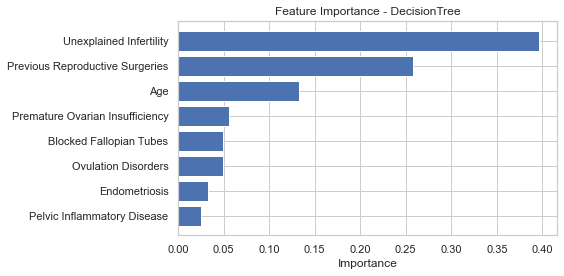

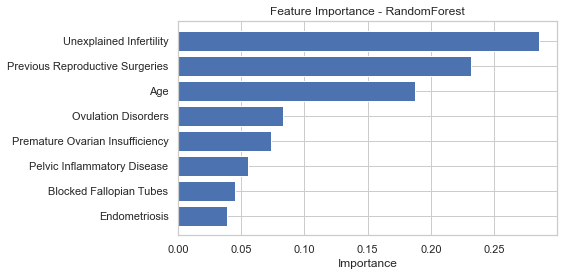

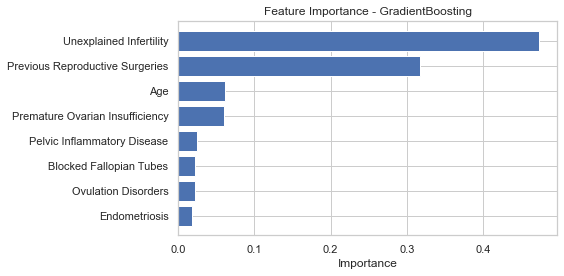

In [132]:
from imblearn.over_sampling import SMOTE


X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]


categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 8
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=9 without balancing

Selected features: ['Ovulation Disorders', 'Blocked Fallopian Tubes', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.900724  0.923475  0.959524  0.940787  0.926596
KNN               0.879416  0.897674  0.962202  0.928509  0.859622
RandomForest      0.878149   0.93862  0.912037  0.924378  0.916407
VotingClassifier  0.859678  0.918305  0.910565  0.913783  0.920008
DecisionTree       0.84841  0.929485  0.882405  0.904547  0.811082

Average Confusion Matrices:

KNN:
[[ 6  6]
 [ 2 55]]

DecisionTree:
[[ 8  3]
 [ 6 51]]

RandomForest:
[[ 9  3]
 [ 5 52]]

GradientBoosting:
[[ 8  4]
 [ 2 55]]

VotingClassifier:
[[ 7  4]
 [ 5 52]]


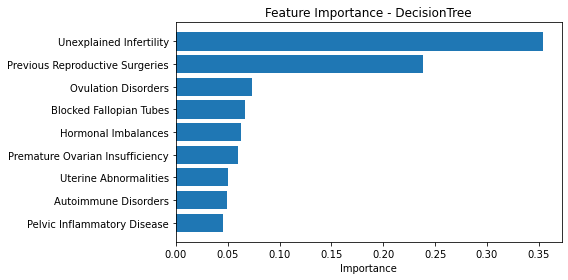

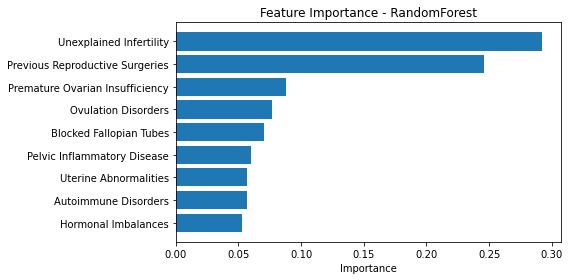

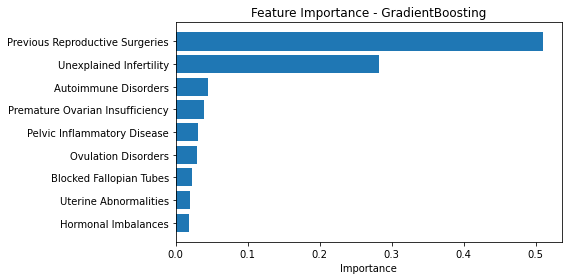

In [112]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

k = 9
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=9 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.907887  0.941343  0.947052   0.94397  0.936889
RandomForest      0.902133  0.930406  0.951988  0.940635  0.926347
VotingClassifier  0.892173  0.933062   0.93668  0.934021  0.940596
DecisionTree      0.880845  0.933987  0.921451  0.926584  0.824528
KNN               0.828471  0.923677  0.861916    0.8906  0.849518

Average Confusion Matrices:

KNN:
[[ 8  4]
 [ 8 49]]

DecisionTree:
[[ 8  3]
 [ 4 53]]

RandomForest:
[[ 8  4]
 [ 2 55]]

GradientBoosting:
[[ 9  3]
 [ 3 54]]

VotingClassifier:
[[ 8  3]
 [ 3 54]]


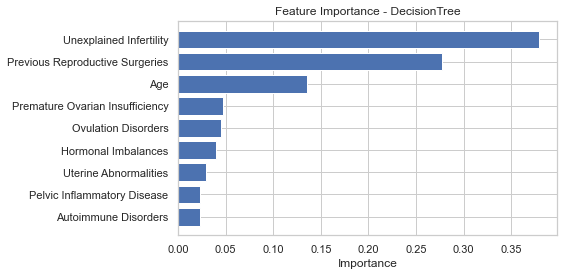

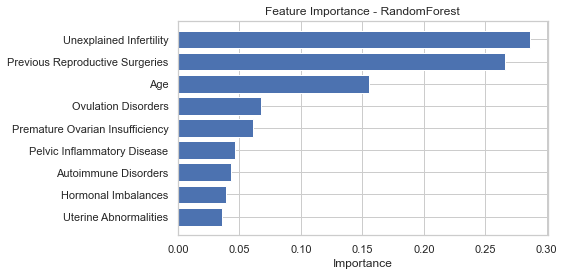

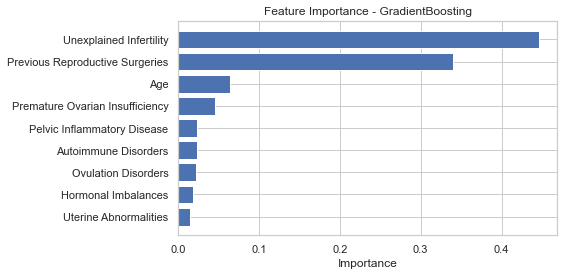

In [133]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 9
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=10 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.920604  0.930492  0.976288   0.95248  0.929912
RandomForest      0.910684  0.925448  0.969557  0.946572  0.934337
VotingClassifier  0.903581  0.928119  0.957678  0.942127  0.934439
KNN               0.892153  0.898012  0.979005  0.936521  0.869947
DecisionTree      0.879457   0.92071  0.935667  0.927048  0.783545

Average Confusion Matrices:

KNN:
[[ 6  6]
 [ 1 56]]

DecisionTree:
[[ 7  4]
 [ 3 54]]

RandomForest:
[[ 8  4]
 [ 1 56]]

GradientBoosting:
[[ 8  4]
 [ 1 56]]

VotingClassifier:
[[ 8  4]
 [ 2 55]]


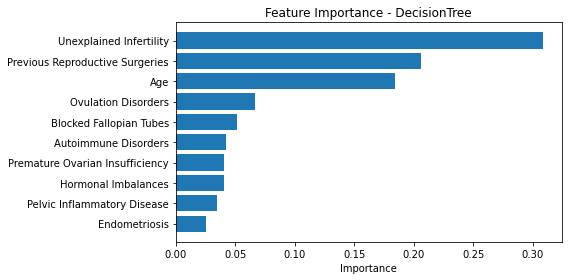

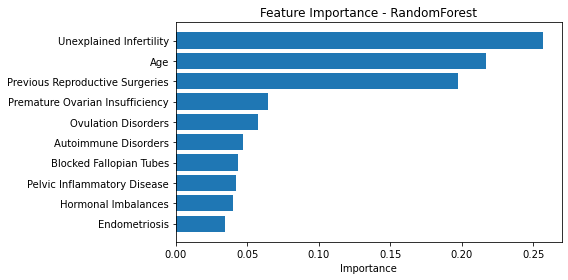

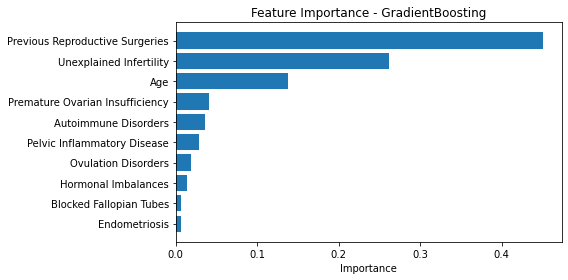

In [113]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 10
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=10 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
RandomForest      0.910684  0.935687  0.956666  0.945618  0.938514
GradientBoosting  0.906459  0.936967  0.950428  0.943462  0.932296
VotingClassifier  0.900744  0.935223  0.945851  0.939785  0.940352
DecisionTree      0.883742  0.929831  0.930436  0.928936  0.812435
KNN               0.822857   0.92748  0.849235  0.885478  0.866026

Average Confusion Matrices:

KNN:
[[ 8  3]
 [ 8 49]]

DecisionTree:
[[ 8  4]
 [ 4 53]]

RandomForest:
[[ 8  3]
 [ 2 55]]

GradientBoosting:
[[ 8  3]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 3 54]]


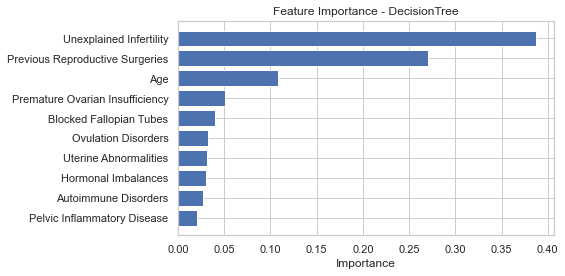

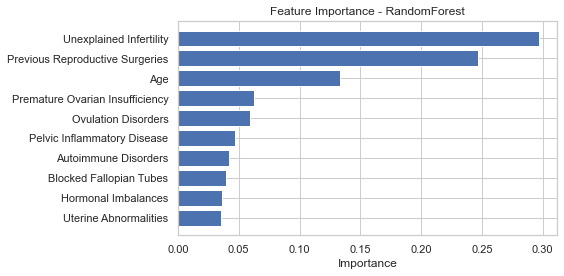

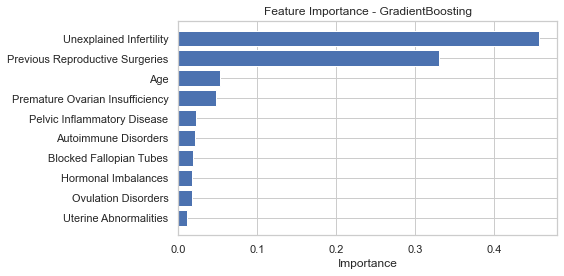

In [134]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 10
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###  Model Traning - with 10-fold cross-validation And SelectKBest K=11

Selected features: ['Age', 'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
GradientBoosting  0.917746  0.933178  0.969278  0.950669  0.933422
RandomForest      0.907847  0.920957  0.971024  0.944907  0.937714
VotingClassifier  0.893742   0.92388  0.948802  0.935692  0.937822
KNN                0.87662  0.886581  0.974348  0.927893  0.859958
DecisionTree      0.869658  0.917674  0.925096  0.920246  0.783968

Average Confusion Matrices:

KNN:
[[ 5  7]
 [ 1 56]]

DecisionTree:
[[ 7  4]
 [ 4 53]]

RandomForest:
[[ 7  4]
 [ 1 56]]

GradientBoosting:
[[ 8  4]
 [ 1 56]]

VotingClassifier:
[[ 8  4]
 [ 3 54]]


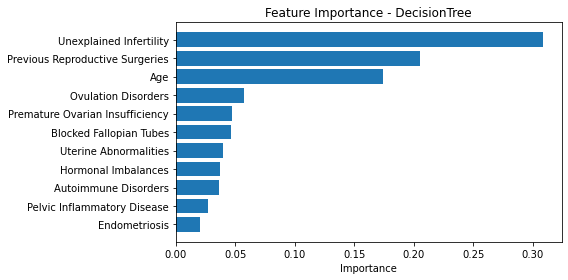

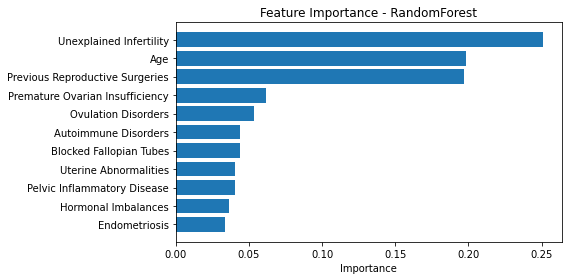

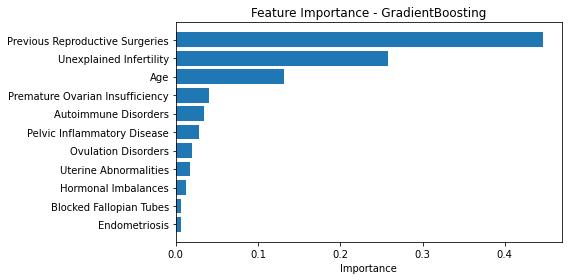

In [114]:
# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 11
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

## Model Traning - with 10-fold cross-validation And SelectKBest K=11 with balancing

Selected features: ['Age', 'Ovulation Disorders', 'Blocked Fallopian Tubes', 'Endometriosis', 'Uterine Abnormalities', 'Pelvic Inflammatory Disease', 'Hormonal Imbalances', 'Premature Ovarian Insufficiency', 'Autoimmune Disorders', 'Previous Reproductive Surgeries', 'Unexplained Infertility']

Model Performance Comparison:
                  accuracy precision    recall        f1   roc_auc
RandomForest      0.912093  0.934023  0.960643  0.946772  0.945558
VotingClassifier  0.903662   0.93674  0.946856  0.941039  0.944112
GradientBoosting  0.902153  0.932146  0.950063  0.940758   0.93772
DecisionTree      0.882374  0.929239  0.928081   0.92747  0.816135
KNN                0.83996  0.939211  0.862799  0.897917  0.868845

Average Confusion Matrices:

KNN:
[[ 9  3]
 [ 8 49]]

DecisionTree:
[[ 8  4]
 [ 4 53]]

RandomForest:
[[ 8  3]
 [ 2 55]]

GradientBoosting:
[[ 8  4]
 [ 2 55]]

VotingClassifier:
[[ 8  3]
 [ 3 54]]


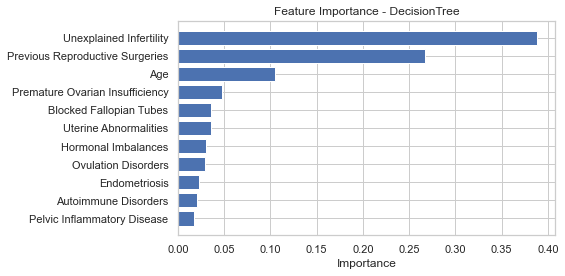

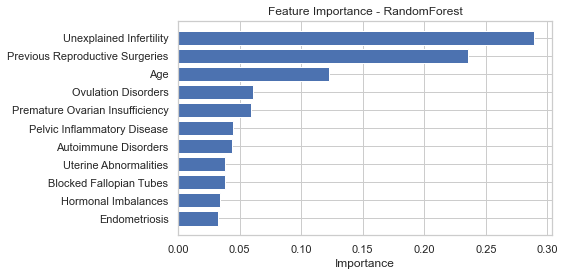

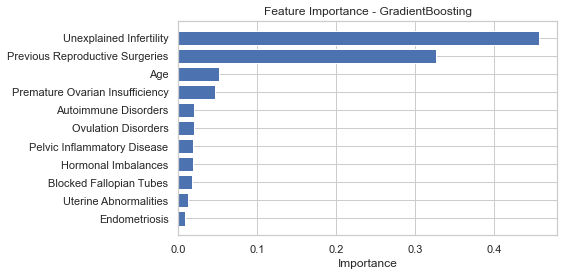

In [136]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_infertility.drop(columns=["Infertility Prediction", "Patient ID"])
y = df_infertility["Infertility Prediction"]

# Define feature types
categorical_features = [
    "Ovulation Disorders", "Blocked Fallopian Tubes", "Endometriosis",
    "Uterine Abnormalities", "Pelvic Inflammatory Disease", "Hormonal Imbalances",
    "Premature Ovarian Insufficiency", "Autoimmune Disorders",
    "Previous Reproductive Surgeries", "Unexplained Infertility"
]
numerical_features = ["Age"]


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


k = 11
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Prepare dataframe with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Add soft voting ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('dt', models["DecisionTree"]),
        ('rf', models["RandomForest"]),
        ('gb', models["GradientBoosting"])
    ],
    voting='soft'
)
models["VotingClassifier"] = voting_model

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
results = {}
feature_importances = {}

# Training and evaluation loop
for name, model in models.items():
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []
    feat_imp = np.zeros(X.shape[1])

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #  Apply SMOTE only on the training data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        model_scores["accuracy"].append(accuracy_score(y_test, y_pred))
        model_scores["precision"].append(precision_score(y_test, y_pred, zero_division=0))
        model_scores["recall"].append(recall_score(y_test, y_pred, zero_division=0))
        model_scores["f1"].append(f1_score(y_test, y_pred, zero_division=0))
        model_scores["roc_auc"].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

        if hasattr(model, "feature_importances_"):
            feat_imp += model.feature_importances_

    results[name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[name]["confusion_matrix"] = np.mean(confusion_matrices, axis=0).astype(int)

    if hasattr(model, "feature_importances_"):
        feature_importances[name] = feat_imp / kf.get_n_splits()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.drop(columns="confusion_matrix").sort_values(by="f1", ascending=False))

# Print confusion matrices
print("\nAverage Confusion Matrices:")
for name in results:
    print(f"\n{name}:\n{results[name]['confusion_matrix']}")

# Plot sorted feature importance (for tree models)
for model_name, importances in feature_importances.items():
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = selected_features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importances)
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


In [140]:
# 3.4.1 Model Training - 10-fold CV without balancing
results_10_Fold = {
    'Model': ['KNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.87662, 0.870946, 0.913501, 0.917746],
    'Precision': [0.886581, 0.914857, 0.925698, 0.933178],
    'Recall': [0.974348, 0.930067, 0.972849, 0.969278],
    'F1 Score': [0.927893, 0.921537, 0.948364, 0.950669],
    'ROC AUC': [0.859958, 0.77143, 0.94154, 0.933422]
}

# 3.4.2 Model Training - 10-fold CV with balancing
results_10_Fold_Balanced = {
    'Model': ['Random Forest', 'Voting Classifier', 'Gradient Boosting', 'KNeighbors', 'Decision Tree'],
    'Accuracy': [0.910684, 0.903521, 0.902213, 0.878109, 0.875231],
    'Precision': [0.932493, 0.941417, 0.940987, 0.941327, 0.931578],
    'Recall': [0.960663, 0.942388, 0.939979, 0.908826, 0.916503],
    'F1 Score': [0.946064, 0.941251, 0.940187, 0.924127, 0.922938],
    'ROC AUC': [0.943795, 0.941652, 0.937325, 0.882090, 0.808295]
}

# 3.4.3 Model Training - 10-fold CV with SelectKBest K=4 without balancing
results_k4 = {
    'Model': ['Gradient Boosting', 'KNeighbors', 'Random Forest', 'Voting Classifier', 'Decision Tree'],
    'Accuracy': [0.909235, 0.909235, 0.906378, 0.906378, 0.890865],
    'Precision': [0.933907, 0.940069, 0.942960, 0.942960, 0.943619],
    'Recall': [0.956961, 0.950396, 0.943250, 0.943250, 0.920278],
    'F1 Score': [0.945203, 0.944930, 0.942727, 0.942727, 0.930623],
    'ROC AUC': [0.905691, 0.835722, 0.903462, 0.906523, 0.903851]
}

# 3.4.4 Model Training - 10-fold CV with SelectKBest K=4 with balancing
results_k4_balanced = {
    'Model': ['KNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Voting Classifier'],
    'Accuracy': [0.907787, 0.882233, 0.882233, 0.882233, 0.882233],
    'Precision': [0.907504, 0.937985, 0.937985, 0.937985, 0.937985],
    'Recall': [0.988259, 0.916317, 0.916317, 0.916317, 0.916317],
    'F1 Score': [0.945920, 0.926885, 0.926885, 0.926885, 0.926885],
    'ROC AUC': [0.823068, 0.889994, 0.890508, 0.892660, 0.890924]
}

# 3.4.5 Model Training - 10-fold CV with SelectKBest K=9 without balancing
results_k9 = {
    'Model': ['Gradient Boosting', 'KNeighbors', 'Random Forest', 'Voting Classifier', 'Decision Tree'],
    'Accuracy': [0.900724, 0.879416, 0.878149, 0.859678, 0.848410],
    'Precision': [0.923475, 0.897674, 0.938620, 0.918305, 0.929485],
    'Recall': [0.959524, 0.962202, 0.912037, 0.910565, 0.882405],
    'F1 Score': [0.940787, 0.928509, 0.924378, 0.913783, 0.904547],
    'ROC AUC': [0.926596, 0.859622, 0.916407, 0.920008, 0.811082]
}

# 3.4.6 Model Training - 10-fold CV with SelectKBest K=9 with balancing
results_k9_balanced = {
    'Model': ['Gradient Boosting', 'Random Forest', 'Voting Classifier', 'Decision Tree', 'KNeighbors'],
    'Accuracy': [0.907887, 0.902133, 0.892173, 0.880845, 0.828471],
    'Precision': [0.941343, 0.930406, 0.933062, 0.933987, 0.923677],
    'Recall': [0.947052, 0.951988, 0.936680, 0.921451, 0.861916],
    'F1 Score': [0.943970, 0.940635, 0.934021, 0.926584, 0.890600],
    'ROC AUC': [0.936889, 0.926347, 0.940596, 0.824528, 0.849518]
}
# Convert to DataFrames
dfs = {
    '10_Fold': pd.DataFrame(results_10_Fold),
    '10_Fold_Balanced': pd.DataFrame(results_10_Fold_Balanced),
    'K=4': pd.DataFrame(results_k4),
    'K=4_Balanced': pd.DataFrame(results_k4_balanced),
    'K=9': pd.DataFrame(results_k9),
    'K=9_Balanced': pd.DataFrame(results_k9_balanced),
}

# Add config type to distinguish later
for name, df in dfs.items():
    df['Config'] = name

# Combine all into a single DataFrame
full_df = pd.concat(dfs.values())
full_df.set_index(['Config', 'Model'], inplace=True)
full_df = full_df.reset_index()


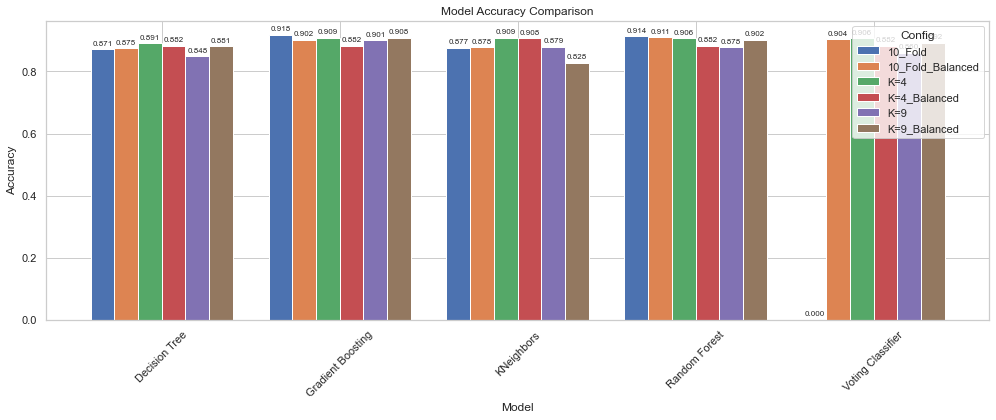

In [141]:
metric = 'Accuracy'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

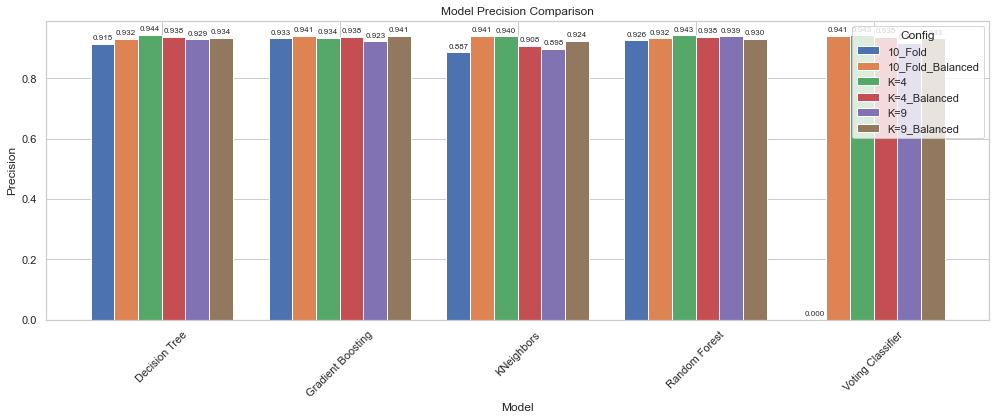

In [142]:
metric = 'Precision'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Precision Comparison')
ax.set_ylabel('Precision')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

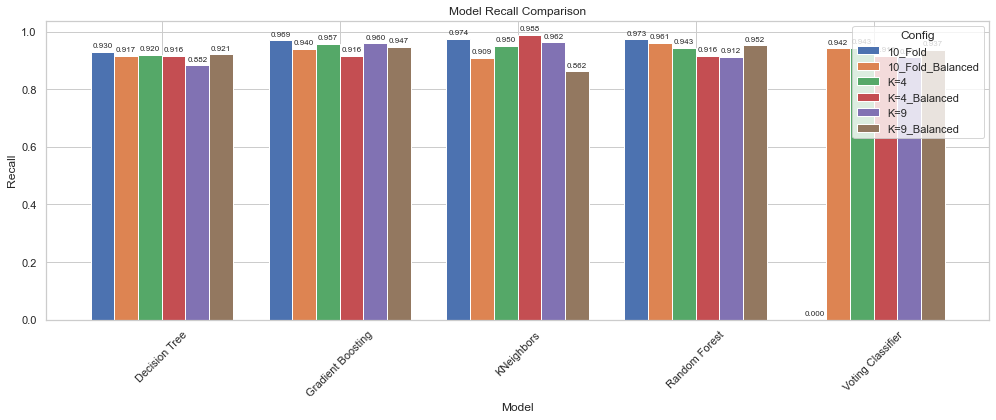

In [143]:
metric = 'Recall'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Recall Comparison')
ax.set_ylabel('Recall')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


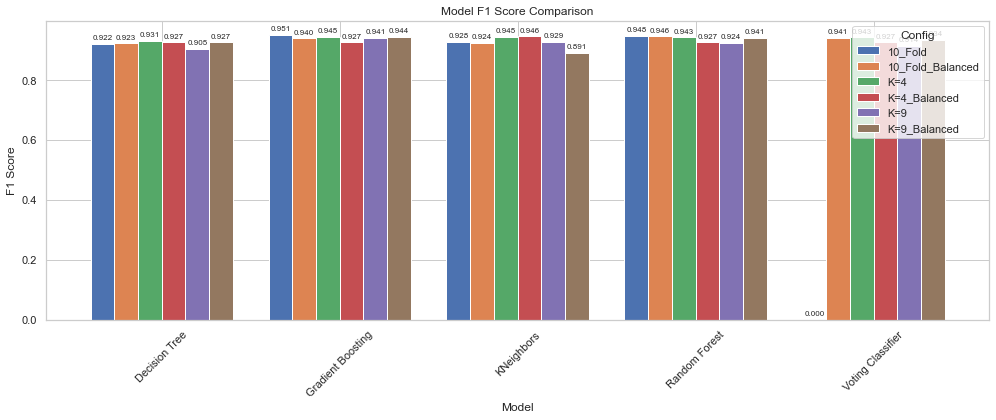

In [144]:
metric = 'F1 Score'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model F1 Score Comparison')
ax.set_ylabel('F1 Score')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

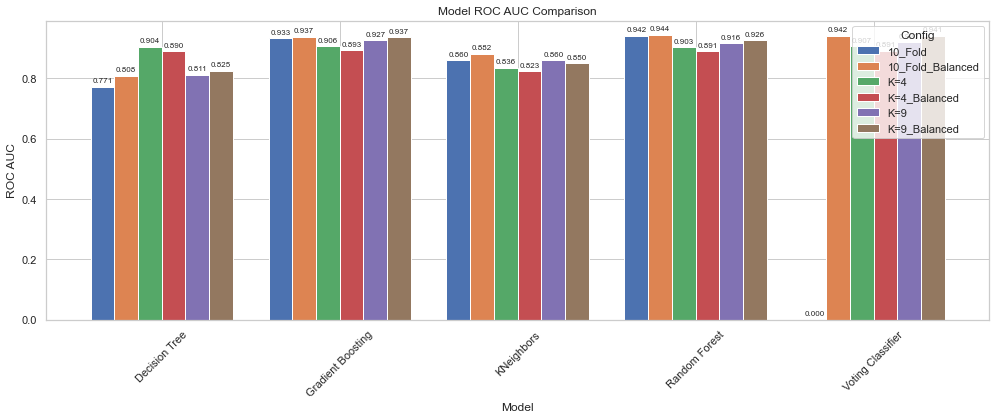

In [145]:
metric = 'ROC AUC'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model ROC AUC Comparison')
ax.set_ylabel('ROC AUC')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()
